In [1]:
from innofw.utils.config import read_cfg
from innofw.core.datasets.segmentation import SegmentationDataset
from innofw.core.datamodules.lightning_datamodules.segmentation_dir import DirSegmentationLightningDataModule

/home/albert/miniconda3/envs/innofw/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-05-08 17:19:11,517 - rdkit - INFO - Enabling RDKit 2022.09.1 jupyter extensions
2023-05-08 17:19:11,575 - h5py._conv - DEBUG - Creating converter from 7 to 5
2023-05-08 17:19:11,575 - h5py._conv - DEBUG - Creating converter from 5 to 7
2023-05-08 17:19:11,576 - h5py._conv - DEBUG - Creating converter from 7 to 5
2023-05-08 17:19:11,576 - h5py._conv - DEBUG - Creating converter from 5 to 7
2023-05-08 17:19:11,607 - rasterio.env - DEBUG - GDAL data found in package: path='/home/albert/miniconda3/envs/innofw/lib/python3.9/site-packages/rasterio/gdal_data'.
2023-05-08 17:19:11,608 - rasterio.env - DEBUG - PROJ data found in package: path='/home/albert/miniconda3/envs/innofw/lib/python3.9/site-packages/rasterio/proj_data'.
2023-05-08 17:19:11,629 - shapely.geos - DEBUG - Found GEOS DLL: <CDLL '/home/albert/miniconda3/envs/innofw/lib/python3.9/site-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1', handle 7a7d1c0 at 0x7f7b6ac56610>, using it.


In [2]:
dm = read_cfg('config/datasets/semantic-segmentation/lung_segmentation.yaml')

In [3]:
dm.setup('train')

In [4]:
import os
os.path.join('/innofw/shm/train', "image")

'/innofw/shm/train/image'

In [11]:
dm.train_dataset.__getitem__(0).values()

dict_values([tensor[1, 1024, 1024] n=1048576 x∈[0., 255.000] μ=118.427 σ=76.984, tensor[5, 1024, 1024] n=5242880 x∈[0., 1.000] μ=0.200 σ=0.400])

In [12]:
import cv2

img = cv2.imread('/innofw/shm/train/label/1.npy')

[ WARN:0@109.543] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/innofw/shm/train/label/1.npy'): can't open/read file: check file path/integrity


In [63]:
import numpy as np
mask = np.load('innofw/shm/train/label/12.npy')

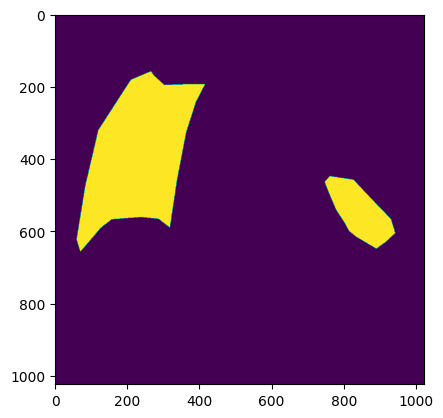

In [68]:
from matplotlib import pyplot as plt

plt.imshow(mask[3] * 255)

In [42]:
mask[1].shape

(1024, 1024)

In [67]:
mask[3].sum()

116412

In [35]:
import os
import numpy as np
from tqdm import tqdm


train_masks = []

for i, file in tqdm(enumerate(os.listdir('innofw/shm/train/label'))):
    mask = np.load('innofw/shm/train/label/' + file)
    new_train_mask = np.zeros((1024, 1024), dtype=np.int64)

    for num in range(4):
        for i in range(1024):
            for j in range(1024):
                if mask[num, i, j] == 1:
                    new_train_mask[i, j] = num + 1

    train_masks.append(new_train_mask)
    np.save('innofw/shm/train/label/' + file, new_train_mask)

test_masks = []

for i, file in tqdm(enumerate(os.listdir('innofw/shm/test/label'))):
    mask = np.load('innofw/shm/test/label/' + file)
    new_test_mask = np.zeros((1024, 1024), dtype=np.int64)

    for num in range(4):
        for i in range(1024):
            for j in range(1024):
                if mask[num, i, j] == 1:
                    new_test_mask[i, j] = num + 1

    test_masks.append(new_test_mask)
    np.save('innofw/shm/test/label/' + file, new_test_mask[i])

161it [01:53,  1.42it/s]
41it [00:28,  1.45it/s]


In [36]:
test_masks[0].shape

(1024, 1024)

In [34]:
np.unique(test_masks[14])

array([0, 4])

In [37]:
for i, file in tqdm(enumerate(os.listdir('innofw/shm/train/label'))):
    np.save('innofw/shm/train/label/' + file, train_masks[i])

161it [00:00, 231.00it/s]


In [38]:
for i, file in tqdm(enumerate(os.listdir('innofw/shm/test/label'))):
    np.save('innofw/shm/test/label/' + file, test_masks[i])

41it [00:00, 225.34it/s]


In [39]:
test_masks[i].shape

(1024, 1024)

In [9]:
train_masks[0][0][0]

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
new_train_masks = np.zeros((1024, 1024), dtype=np.int64)

for num in range(4):
    for i in range(1024):
        for j in range(1024):
            if train_masks[num, i, j] == 1:
                new_train_masks[i, j] = num + 1

TypeError: list indices must be integers or slices, not tuple

In [51]:
for mask in masks:
    print(mask.sum())

IndexError: index 4 is out of bounds for axis 0 with size 4

In [16]:
for i, mask in enumerate(masks):
    masks[i] = mask[1:, :, :]

In [17]:
masks[0].shape

(4, 1024, 1024)

In [38]:
dataset_types = ['train', 'test']
masks = []
for dataset_type in dataset_types:
    for i, file in enumerate(os.listdir('innofw/shm/' + dataset_type + '/label')):
        masks.append(np.load('innofw/shm/' + dataset_type + '/label/' + file))

In [39]:
masks[0].shape

(3, 1024, 1024)

In [40]:
for mask in masks:
    print(mask.sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
